In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
data = df.copy()
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [3]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [4]:
data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177861.000000,177866.000000,177866.000000,177866.000000,177477.000000,1.778660e+05,1.778610e+05
mean,98172.453506,2020.515512,58.842162,1073.109363,29.127481,2.202313e+08,5.297672e+10
std,2442.450668,2.989384,91.981298,8358.624956,14.892169,7.584987e+07,1.578047e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.814743e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282522e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548445e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [5]:
data = data.dropna()
data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [6]:
type = data['Electric Vehicle Type'].value_counts()
type


Electric Vehicle Type
Battery Electric Vehicle (BEV)            138947
Plug-in Hybrid Electric Vehicle (PHEV)     38526
Name: count, dtype: int64

C:\Users\Mihit\AppData\Local\Temp\ipykernel_9256\3999443521.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = type.values, y = type.index,palette="flare")


Text(0, 0.5, 'Electric Vehicle Type')

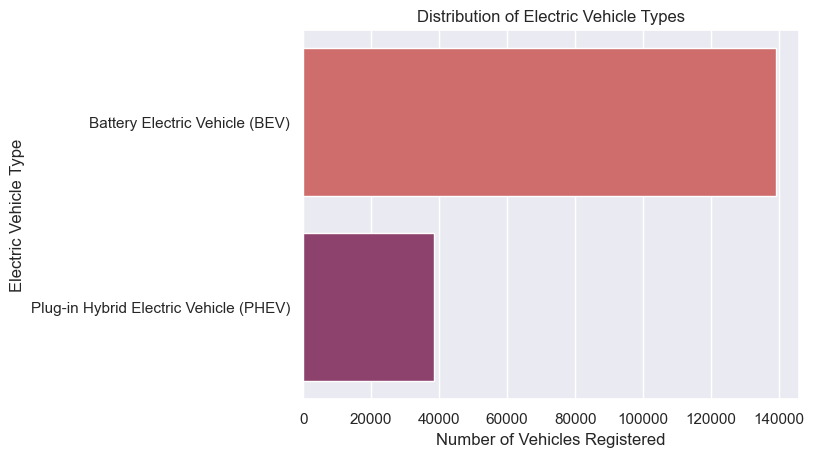

In [7]:
sns.barplot(x = type.values, y = type.index,palette="flare")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')


In [8]:
ev_adoption_by_year = data['Model Year'].value_counts().sort_values()
ev_adoption_by_year

Model Year
2003        1
1998        1
1997        1
2002        2
1999        5
2000        7
2008       19
2010       23
2011      775
2012     1614
2014     3496
2013     4399
2015     4826
2016     5469
2024     7072
2017     8534
2019    10913
2020    11740
2018    14286
2021    19063
2022    27708
2023    57519
Name: count, dtype: int64

In [9]:

ev_adoption_by_year_df = pd.DataFrame(ev_adoption_by_year)
ev_adoption_by_year_df

,count
Model Year,
2003,1
1998,1
1997,1
2002,2
1999,5
2000,7
2008,19
2010,23
2011,775


In [10]:
ev_adoption_by_year_df.reset_index(drop=True, inplace=True)
ev_adoption_by_year_df.index += 1
ev_adoption_by_year_df['Model Year'] = ev_adoption_by_year.index
ev_adoption_by_year_df

,count,Model Year
1,1,2003
2,1,1998
3,1,1997
4,2,2002
5,5,1999
6,7,2000
7,19,2008
8,23,2010
9,775,2011
10,1614,2012


C:\Users\Mihit\AppData\Local\Temp\ipykernel_9256\3338875450.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_adoption_by_year.index , y=ev_adoption_by_year.values,palette="magma")


Text(0.5, 1.0, 'Ev adoption overall')

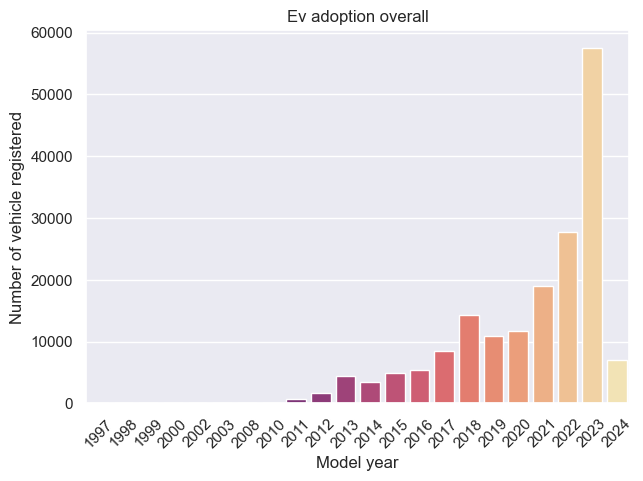

In [11]:
sns.barplot(x=ev_adoption_by_year.index , y=ev_adoption_by_year.values,palette="magma")
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel('Model year')
plt.ylabel('Number of vehicle registered')
plt.title('Ev adoption overall')

In [15]:
data['County'].value_counts().sort_values(ascending = False).head(3)
counties = data['County'].value_counts().sort_values(ascending = False).head(3).index
top_counties_data = data[data['County'].isin(counties)]



In [16]:
city_by_top_counties = top_counties_data.groupby(['County','City']).size().sort_values(ascending = False).reset_index(name = 'Number of vehicle').head(10)
city_by_top_counties

,County,City,Number of vehicle
0,King,Seattle,29447
1,King,Bellevue,8930
2,King,Redmond,6478
3,King,Kirkland,5362
4,King,Sammamish,5280
5,King,Renton,4980
6,Snohomish,Bothell,4663
7,Pierce,Tacoma,3722
8,King,Tukwila,2927
9,King,Kent,2782


Text(0.5, 1.0, 'Top cities in top counties by ev registration')

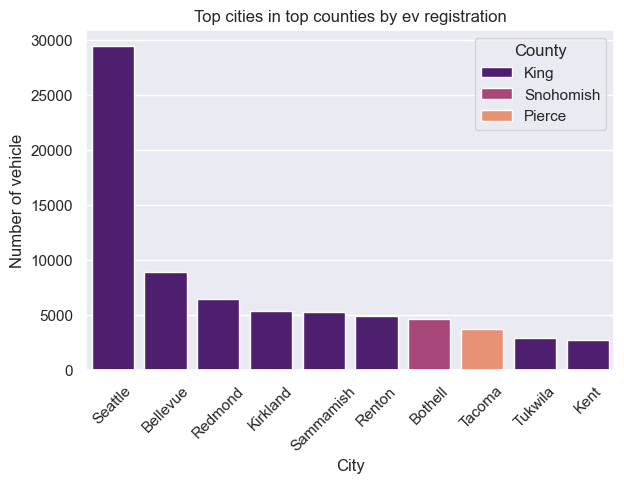

In [18]:
sns.barplot(x = city_by_top_counties['City'], y = city_by_top_counties['Number of vehicle'], hue='County', data=city_by_top_counties, palette="magma")
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel('City')
plt.ylabel('Number of vehicle')
plt.title('Top cities in top counties by ev registration')

In [15]:
top_makers = data['Make'].value_counts().head(10)
top_makers

Make
TESLA         79471
NISSAN        13984
CHEVROLET     13651
FORD           9177
BMW            7556
KIA            7423
TOYOTA         6254
VOLKSWAGEN     4993
JEEP           4468
HYUNDAI        4398
Name: count, dtype: int64

C:\Users\Mihit\AppData\Local\Temp\ipykernel_15920\1757147694.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_makers.values , y = top_makers.index,palette="viridis")


Text(0.5, 1.0, 'Top 10 popular ev makers')

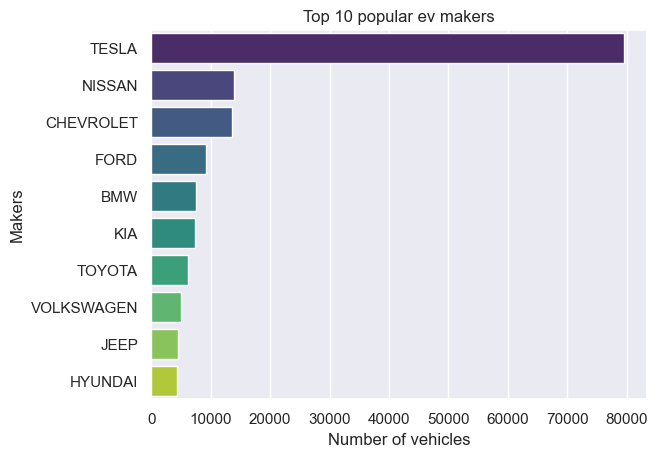

In [16]:
sns.barplot(x = top_makers.values , y = top_makers.index,palette="viridis")
plt.xlabel('Number of vehicles')
plt.ylabel('Makers')
plt.title('Top 10 popular ev makers')

In [17]:
data['Model'].value_counts()

Model
MODEL Y        35921
MODEL 3        30009
LEAF           13352
MODEL S         7711
BOLT EV         6811
               ...  
745LE              2
918                1
S-10 PICKUP        1
SPECTRE            1
BENTAYGA           1
Name: count, Length: 139, dtype: int64

In [19]:
maker = data['Make'].value_counts().head(3).index
top_makers_data = data[data['Make'].isin(maker)]

In [19]:
model_by_makers = top_makers_data.groupby(['Make','Model']).size().sort_values(ascending = False).reset_index(name = 'Number of vehicle').head(10)
model_by_makers

,Make,Model,Number of vehicle
0,TESLA,MODEL Y,35921
1,TESLA,MODEL 3,30009
2,NISSAN,LEAF,13352
3,TESLA,MODEL S,7711
4,CHEVROLET,BOLT EV,6811
5,TESLA,MODEL X,5784
6,CHEVROLET,VOLT,4782
7,CHEVROLET,BOLT EUV,1770
8,NISSAN,ARIYA,632
9,CHEVROLET,SPARK,240


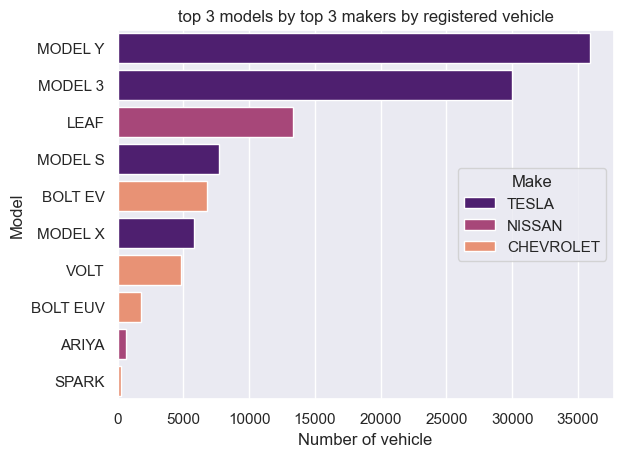

In [20]:
sns.barplot(x = model_by_makers['Number of vehicle'] , y = model_by_makers['Model'] , hue = 'Make' , data = model_by_makers , palette="magma")
plt.title('top 3 models by top 3 makers by registered vehicle')
plt.legend(title='Make', loc='center right')

In [21]:
data['Electric Range']

0         291
1           0
2         270
3         210
4           0
         ... 
177861      0
177862      0
177863      0
177864      0
177865      0
Name: Electric Range, Length: 177473, dtype: int64

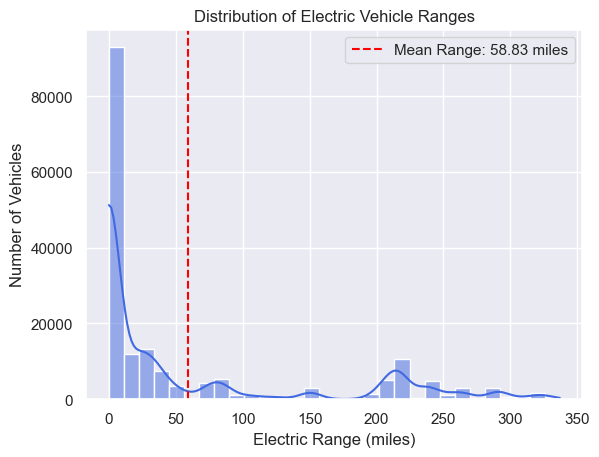

In [22]:
sns.histplot(data['Electric Range'],bins = 30,kde = True,color ='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {data["Electric Range"].mean():.2f} miles')
plt.legend()


In [23]:
average_range_by_year = data.groupby('Model Year')['Electric Range'].mean().reset_index()
average_range_by_year

,Model Year,Electric Range
0,1997,39.000000
1,1998,58.000000
2,1999,74.000000
3,2000,58.000000
4,2002,95.000000
5,2003,95.000000
6,2008,220.000000
7,2010,226.086957
8,2011,70.891613
9,2012,61.172243


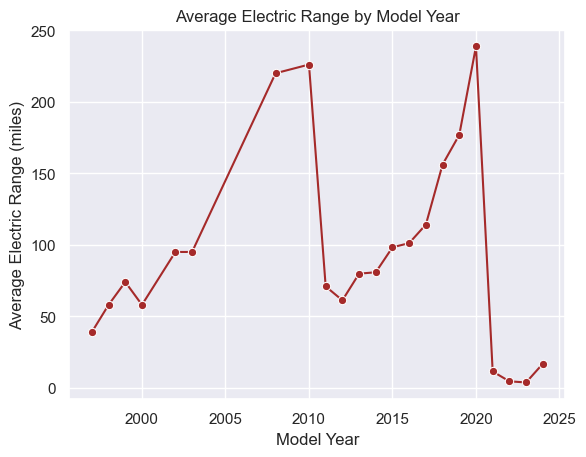

In [24]:
sns.lineplot(x='Model Year' , y = 'Electric Range',data = average_range_by_year,marker = 'o',color = 'brown')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

In [25]:
average_range_by_model = top_makers_data.groupby(['Make','Model'])['Electric Range'].mean().sort_values(ascending = False).reset_index().head(10)
average_range_by_model

,Make,Model,Electric Range
0,TESLA,ROADSTER,234.673913
1,TESLA,MODEL S,176.794449
2,CHEVROLET,BOLT EV,154.857143
3,TESLA,MODEL X,137.192600
4,TESLA,MODEL 3,109.463028
5,NISSAN,LEAF,84.148742
6,CHEVROLET,SPARK,82.000000
7,CHEVROLET,VOLT,45.365119
8,CHEVROLET,S-10 PICKUP,39.000000
9,TESLA,MODEL Y,19.191531


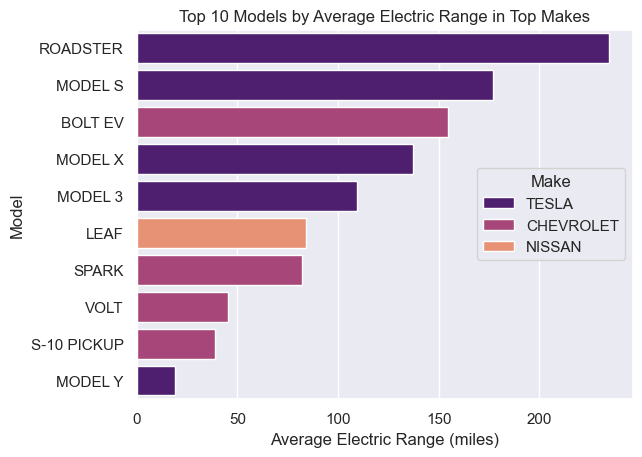

In [26]:
sns.barplot(x = 'Electric Range',y = 'Model' , hue = 'Make' , data = average_range_by_model , palette = 'magma')
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()